In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [2]:
topic = pd.read_excel('Topics_stars10000_project_keyword.xlsx')
topic

,project_name,topic_keyword
0,freeCodeCamp/freeCodeCamp,"['react', 'nodejs', 'javascript', 'd3', 'teach..."
1,996icu/996.ICU,[]
2,EbookFoundation/free-programming-books,"['education', 'list', 'books', 'resource', 'ha..."
3,jwasham/coding-interview-university,"['computer-science', 'algorithm', 'algorithms'..."
4,vuejs/vue,"['javascript', 'framework', 'vue', 'frontend']"
...,...,...
995,visionmedia/superagent,[]
996,charlax/professional-programming,"['programming-language', 'learning', 'computer..."
997,oracle/graal,"['javascript', 'ruby', 'python', 'c', 'java', ..."
998,dvajs/dva,"['redux', 'framework', 'redux-saga', 'elm', 'd..."


In [3]:
a = eval(topic['topic_keyword'][0])
type(a)

list

In [4]:
# topic_keyword 열이 리스트 형태가 아닌 문자열 형태로 되어있기에 리스트로 전환
keyword = []
for i in topic['topic_keyword']:
    keyword.append(eval(i))
keyword # 해당 keyword를 통해 model을 학습시킬 예정

[['react',
  'nodejs',
  'javascript',
  'd3',
  'teachers',
  'community',
  'education',
  'programming',
  'curriculum',
  'math',
  'freecodecamp',
  'learn-to-code',
  'nonprofits',
  'careers',
  'certification'],
 [],
 ['education', 'list', 'books', 'resource', 'hacktoberfest'],
 ['computer-science',
  'algorithm',
  'algorithms',
  'interview',
  'data-structures',
  'software-engineering',
  'coding-interviews',
  'study-plan',
  'interview-prep',
  'interview-preparation',
  'coding-interview',
  'programming-interviews'],
 ['javascript', 'framework', 'vue', 'frontend'],
 ['react', 'javascript', 'library', 'ui', 'frontend', 'declarative'],
 ['computer-science',
  'engineering',
  'roadmap',
  'study-plan',
  'developer-roadmap',
  'devops-roadmap',
  'frontend-roadmap',
  'backend-roadmap'],
 ['lists', 'awesome', 'unicorns', 'resources', 'awesome-list'],
 ['python',
  'machine-learning',
  'deep-neural-networks',
  'deep-learning',
  'neural-network',
  'tensorflow',
  'ml',


## 모델 생성하기

- size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.

- window = 컨텍스트 윈도우 크기

- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)

- workers = 학습을 위한 프로세스 수

- sg = 0은 CBOW, 1은 Skip-gram.
    - CBOW : 주변 단어를 통해 해당 단어를 예측
    - Skip-gram : 해당 단어를 통해 주변 단어를 예측
    
https://hoonzi-text.tistory.com/2

In [5]:
# 모델 학습

model = Word2Vec(sentences = keyword, vector_size=100, alpha=0.025, window = 5, min_count = 5, workers = 4, sg = 1)

# vector_size를 늘릴수록 similarity값이 증가하는 모습
# CBOW를 사용할지, Skip-gram을 사용할지 조금 더 고민이 필요함

In [6]:
model.wv.vectors.shape

(213, 100)

In [7]:
model.wv.most_similar('python') # 해당 단어를 입력했을 때 그와 가장 similarity가 높은 단어 상위 10개 추출

[('vue', 0.76954185962677),
 ('javascript', 0.7531784176826477),
 ('react', 0.7491326332092285),
 ('html', 0.7452508211135864),
 ('typescript', 0.7308343052864075),
 ('webpack', 0.7300595045089722),
 ('deep-learning', 0.7255521416664124),
 ('linux', 0.7164545655250549),
 ('cli', 0.7152134776115417),
 ('electron', 0.7116757035255432)]

## 모델 저장

In [8]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = 'github_keyword_txt'

# model.save(model_name)
model.wv.save_word2vec_format(model_name) # 모델을 wv 형태로 저장

<ipython-input-8-012c6bc0ec76>:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


## 모델 로드 및 실행

https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim

https://programmers.co.kr/learn/courses/21/lessons/1698#

In [9]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g
from gensim.models import KeyedVectors

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'github_keyword_txt'

# vocab = list(model.wv.index_to_key)
# X = model[vocab]

# loaded_model = KeyedVectors.load_word2vec_format(model_name) # 모델 로드

model = KeyedVectors.load_word2vec_format(model_name, binary= False) # 모델 로드

words = list(model.key_to_index.keys())

# X = {word:model[word]%EMBEDDING_DIM for word in words} # 임베딩 에러

X = model[words]


print(len(X))
print(X[0][:10])

213
[-0.09249186  0.00700107  0.038167    0.04789124 -0.09072224 -0.21425663
  0.17350341  0.20076619 -0.06506635 -0.13542289]


In [10]:
len(words)

213

## t-SNE 시각화

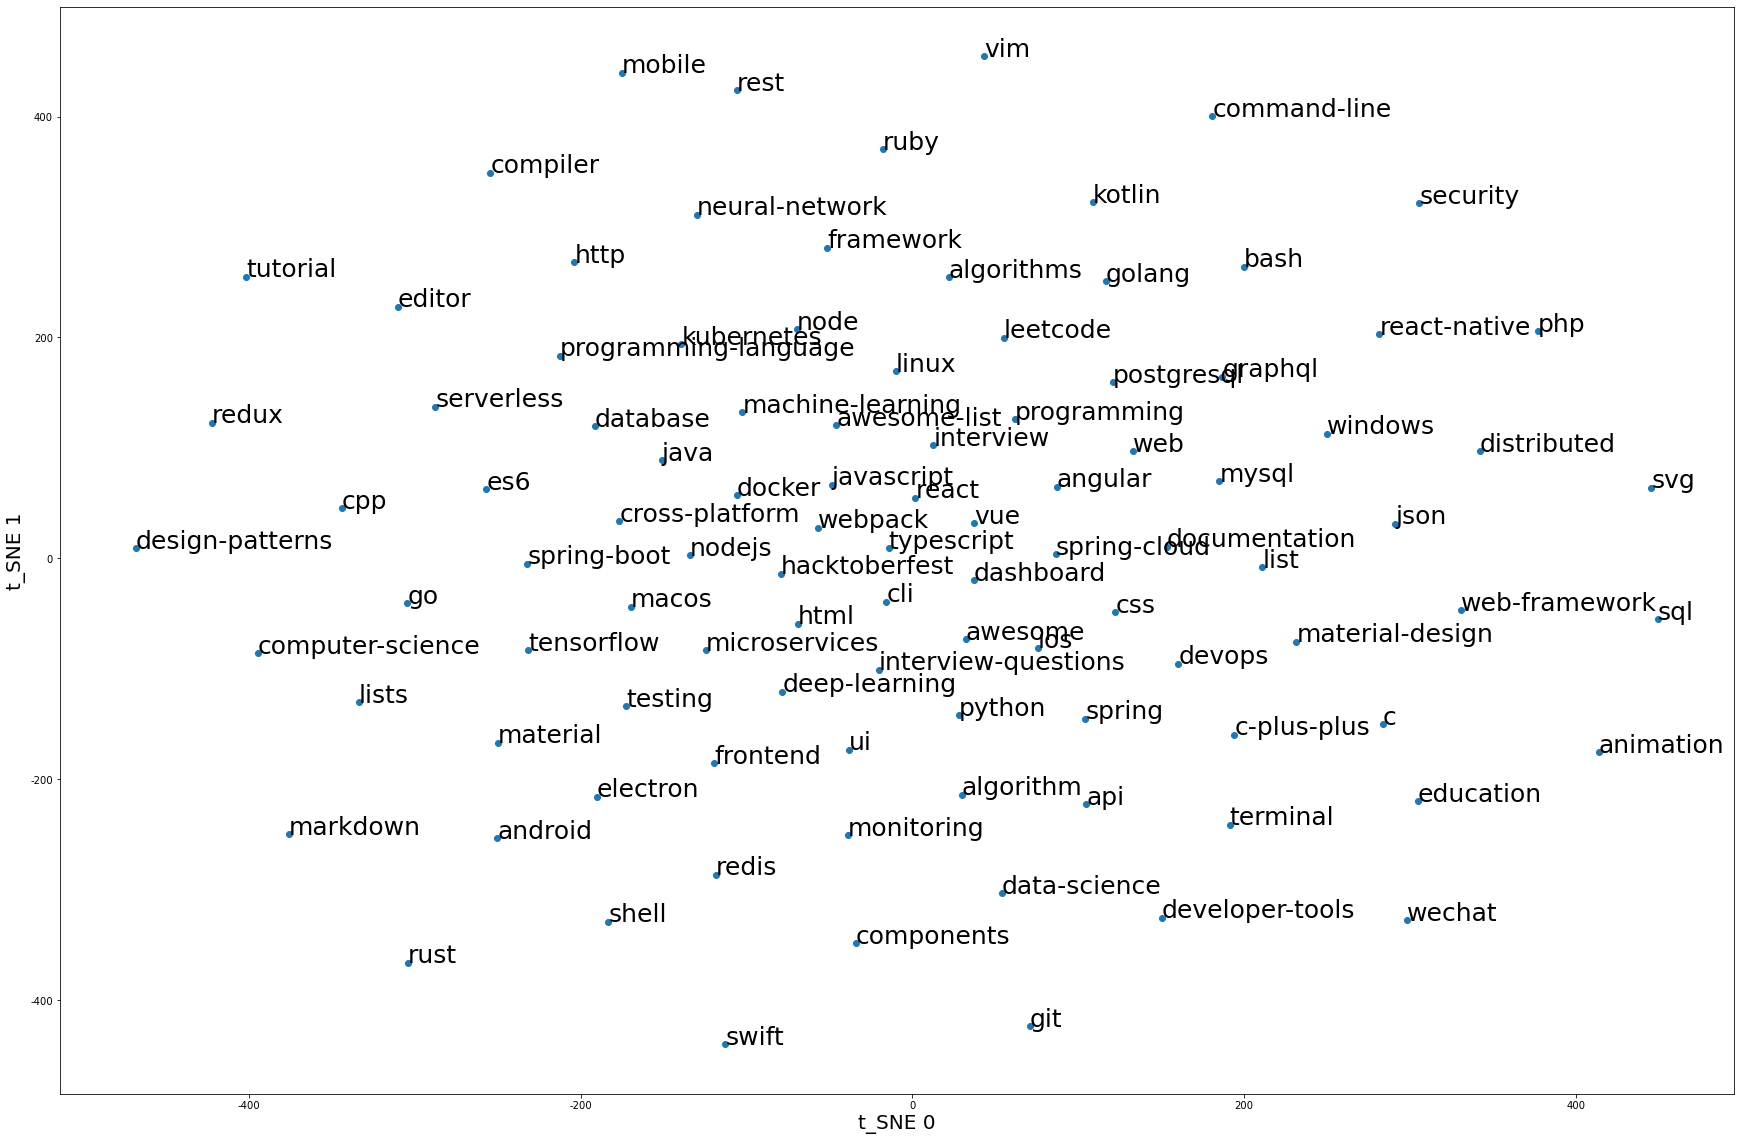

In [11]:
X_show = X[:100,:] # 100개의 단어에 대해서만 시각화
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_show)

df = pd.DataFrame(X_tsne, index=words[:100], columns=['x','y'])
fig = plt.figure()
fig.set_size_inches(30,20)
ax = fig.add_subplot(1,1,1)
ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=25)
    
plt.xlabel("t_SNE 0", fontsize=20)
plt.ylabel("t_SNE 1", fontsize=20)
plt.show()

## PCA 시각화

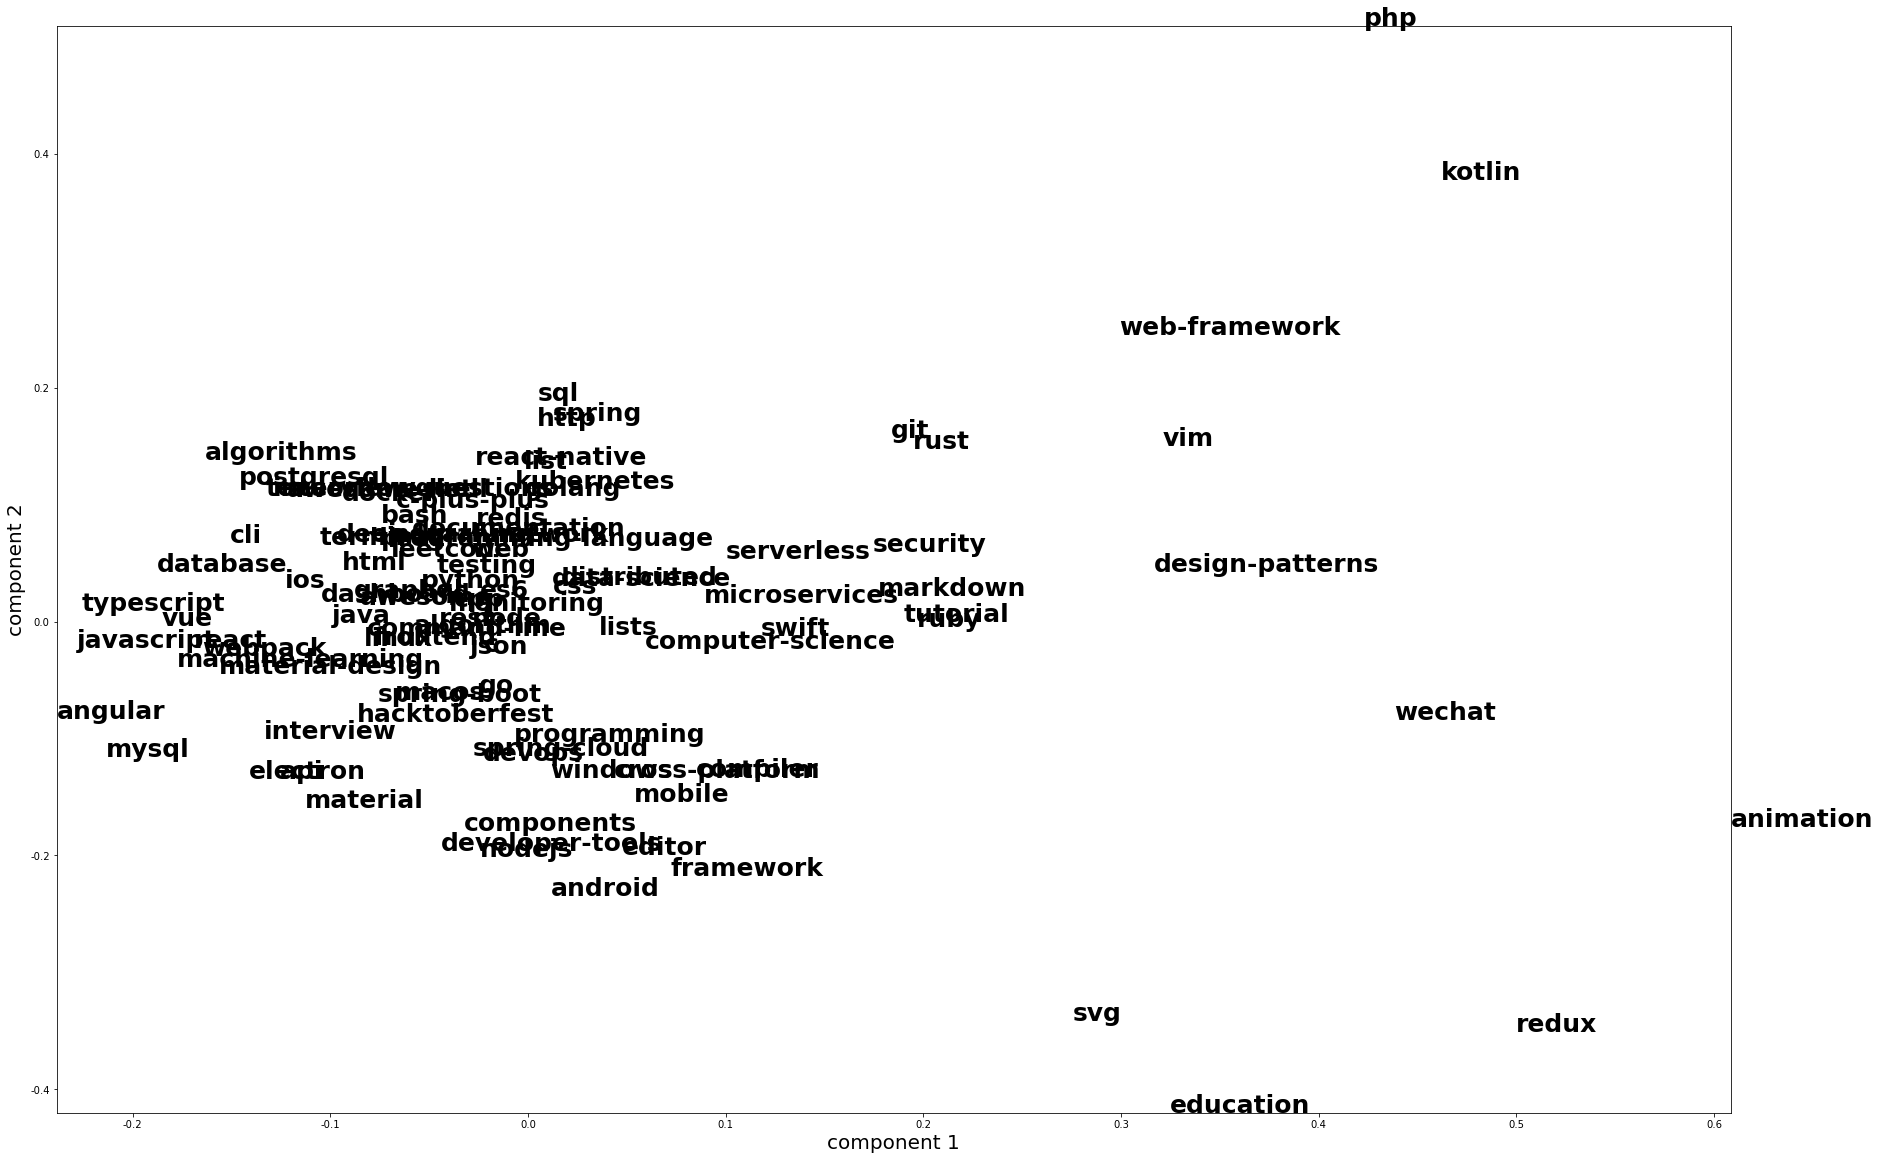

In [12]:
X_show = X[:100,:]
vocab_show = words[:100]
pca = PCA(n_components=2)
pca.fit(X_show)
x_pca = pca.transform(X_show)

plt.figure(figsize=(30,20))
plt.xlim(x_pca[:,0].min(), x_pca[:,0].max())
plt.ylim(x_pca[:,1].min(), x_pca[:,1].max())

for i in range(len(X_show)):
    plt.text(x_pca[i,0], x_pca[i,1], str(vocab_show[i]),
            fontdict={'weight':'bold', 'size':25})
plt.xlabel('component 1', fontsize=20)
plt.ylabel('component 2', fontsize=20)
plt.show()